In [1]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

#  Perceptron Multicapa

# Datos

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 79.1MB/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 23.6MB/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 90.9MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.68MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



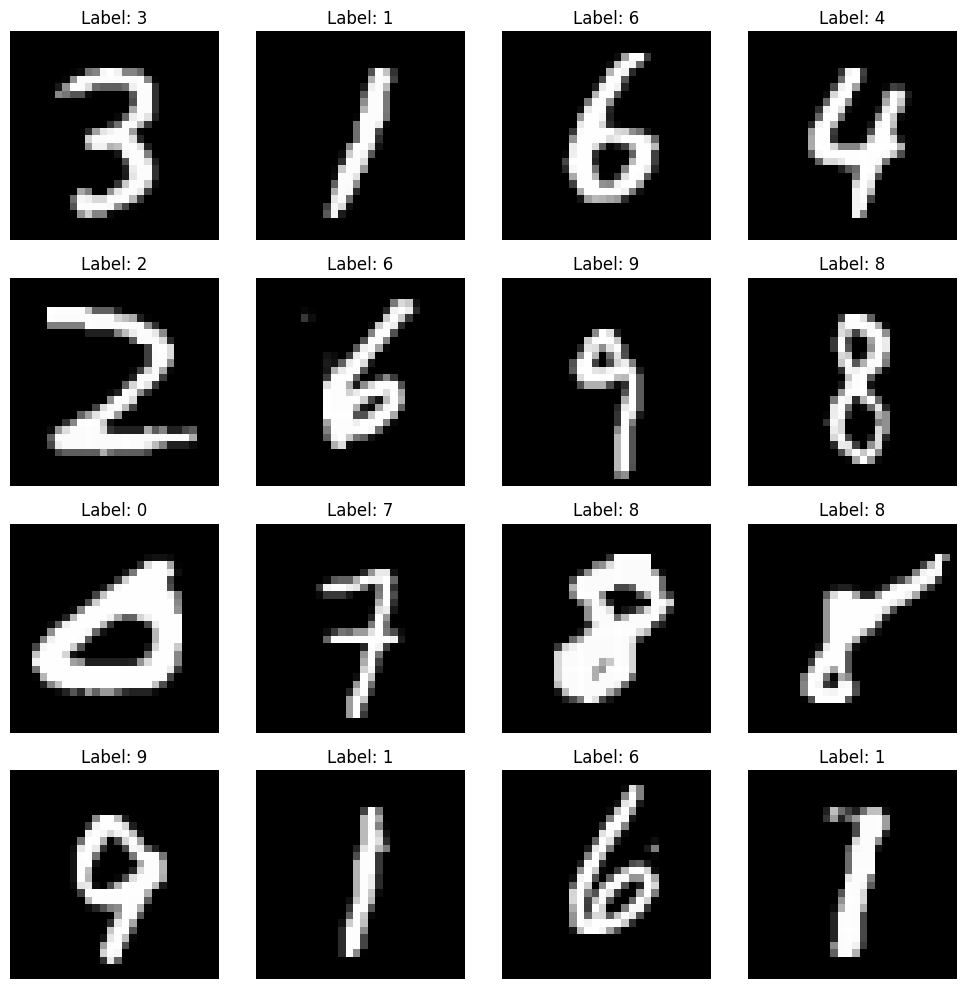

In [2]:

# Load MNIST dataset
# Definimos una secuencia de transformaciones para aplicar a las imágenes del dataset.
# En este caso, solo convertimos las imágenes a tensores utilizando `ToTensor()`.
# Esto es necesario para que las imágenes estén en un formato compatible con PyTorch.
transform = transforms.Compose([
    transforms.ToTensor()  # Convierte la imagen de un formato PIL o numpy.ndarray a un tensor.
])

# Cargamos el dataset MNIST de entrenamiento.
# `root='./data'` especifica el directorio donde se descargarán los datos si no están presentes.
# `train=True` indica que queremos el conjunto de datos de entrenamiento.
# `transform=transform` aplica las transformaciones definidas previamente a cada imagen.
# `download=True` descarga los datos si no están disponibles en el directorio especificado.
mnist_dataset = datasets.MNIST(
    root='./data', train=True, transform=transform, download=True
)

# Creamos un DataLoader que nos permite cargar los datos en lotes pequeños.
# `dataset=mnist_dataset` es el dataset que se cargará.
# `batch_size=16` indica que cada lote contendrá 16 imágenes y etiquetas.
# `shuffle=True` mezcla los datos aleatoriamente en cada época, mejorando la generalización del modelo.
data_loader = DataLoader(
    mnist_dataset, batch_size=16, shuffle=True
)

# Obtenemos un único lote de datos del DataLoader.
# `next(iter(data_loader))` convierte el DataLoader en un iterador y toma el primer lote.
# El lote contiene `images` (los tensores de las imágenes) y `labels` (las etiquetas correspondientes).
images, labels = next(iter(data_loader))


# Plot the images in a grid
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].squeeze(), cmap='gray')
    plt.title(f'Label: {labels[i].item()}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Arquitectura

In [12]:
# Definimos el modelo MLP
# MLP hereda de nn.Module, lo que permite utilizar las funciones y propiedades de PyTorch
# para crear, entrenar y evaluar redes neuronales.
class MLP(nn.Module):
    def __init__(self):
        # Inicializamos la clase base nn.Module
        # Esto habilita funciones esenciales como la gestión de capas y forward pass.
        super(MLP, self).__init__()
        # Capa completamente conectada: de entrada (28x28 píxeles) a 256 neuronas
        self.fc1 = nn.Linear(28 * 28, 256)
        # Capa oculta: de 100 neuronas a 80 neuronas
        self.fc2 = nn.Linear(256, 224)
        # Capa oculta: de 80 neuronas a 60 neuronas
        self.fc3 = nn.Linear(224, 192)
        # Capa oculta: de 60 neuronas a 40 neuronas
        self.fc4 = nn.Linear(192, 160)
        # Capa de salida: de 40 neuronas a 10 clases (números del 0 al 9)
        self.fc5 = nn.Linear(160, 10)
        # Función de activación ReLU
        self.relu = nn.ReLU()
        # Dropout para evitar sobreajuste
        self.dropout = nn.Dropout(0.2)

    # Definimos cómo pasa la información a través de la red
    # Este método es obligatorio en las clases que heredan de nn.Module.
    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Aplanamos las imágenes (de 28x28 a 1D)
        x = self.relu(self.fc1(x))  # Aplicamos la primera capa y Sigmoid
        x = self.dropout(x)         # Aplicamos Dropout
        x = self.relu(self.fc2(x))  # Aplicamos la segunda capa y Sigmoid
        x = self.dropout(x)         # Aplicamos Dropout
        x = self.relu(self.fc3(x))  # Aplicamos la tercera capa y Sigmoid
        x = self.dropout(x)         # Aplicamos Dropout
        x = self.relu(self.fc4(x))  # Aplicamos la cuarta capa y Sigmoid
        x = self.dropout(x)         # Aplicamos Dropout
        x = self.fc5(x)             # Aplicamos la capa de salida
        return x

1. Valores 1ra Ejecucion:<br>
Época [1/10], Pérdida: 0.2182
Época [2/10], Pérdida: 0.2803
Época [3/10], Pérdida: 0.0815
Época [4/10], Pérdida: 0.2138
Época [5/10], Pérdida: 0.1569
Época [6/10], Pérdida: 0.0757
Época [7/10], Pérdida: 0.0287
Época [8/10], Pérdida: 0.3185
Época [9/10], Pérdida: 0.0172
Época [10/10], Pérdida: 0.0963<br>
Accuracy en el conjunto de prueba: 97.67% <br>
2. 1er cambio en Arquitectura: <br>
*  Se modifica numero de neuronas:
* - Capa completamente conectada: de entrada (28x28 píxeles) a 100 neuronas
* - Capa oculta: de 100 neuronas a 80 neuronas
* - Capa oculta: de 80 neuronas a 60 neuronas
* - Capa oculta: de 60 neuronas a 40 neuronas
* - Capa de salida: de 40 neuronas a 10 clases (números del 0 al 9)
*  Se agregan 2 capas ocultas.
* Se modifica la funcion de activacion (de ReLU a Sigmoid)
* Resultado del Entrenamiento (1er cambio en Arquitectura):
* Valores 2da Ejecucion: <br>
Época [1/10], Pérdida: 0.9339
Época [2/10], Pérdida: 0.4045
Época [3/10], Pérdida: 0.5679
Época [4/10], Pérdida: 0.2500
Época [5/10], Pérdida: 0.2769
Época [6/10], Pérdida: 0.0875
Época [7/10], Pérdida: 0.3500
Época [8/10], Pérdida: 0.3871
Época [9/10], Pérdida: 0.0709
Época [10/10], Pérdida: 0.2696<br>
Accuracy en el conjunto de prueba: 95.66% <br>
* Conclusion: variaciones en los valores resultante de las epocas, teniendo un mayor valor de perdida. Disminucion en el porcentaje del Accuracy quedando en un: 95.66%.  Los cambios realizados no reflejan un mejor resultado respecto al codigo original. <br>
2. 2do cambio en Arquitectura: <br>
* Se modifica la funcion de activacion de Sigmoid a ReLU, para analizar si la la variacion en la Perdida y Accuracy, esta dada por la funcion de activacion o los cambios en el numeros de cpas y celulas.<br>
* Resultado del Entrenamiento (2do cambio en Arquitectura): <br>
Época [1/10], Pérdida: 0.2348
Época [2/10], Pérdida: 0.5427
Época [3/10], Pérdida: 0.0350
Época [4/10], Pérdida: 0.1471
Época [5/10], Pérdida: 0.1517
Época [6/10], Pérdida: 0.1792
Época [7/10], Pérdida: 0.4189
Época [8/10], Pérdida: 0.1986
Época [9/10], Pérdida: 0.1589
Época [10/10], Pérdida: 0.1025 <br>
Accuracy en el conjunto de prueba: 96.41% <br>
* Conclusion: Con el cambio de la funcion de activacion (ReLu) se presenta variaciones en los valores resultante de las epocas, teniendo un menor valor de perdida. Aumento en el porcentaje del Accuracy quedando a un: 96.41%. Sin embargo no mejora el porcentaje del Accuracy respecto al codigo original. <br>
3. 3er cambio en Arquitectura: <br>
* Se modifica numero de neuronas pasando de 100 de 256
* - Capa completamente conectada: de entrada (28x28 píxeles) a 256 neuronas
* - Capa oculta: de 256 neuronas a 224 neuronas
* - Capa oculta: de 224 neuronas a 192 neuronas
* - Capa oculta: de 192 neuronas a 160 neuronas
* - Capa de salida: de 160 neuronas a 10 clases (números del 0 al 9) <br>
* Resultado del Entrenamiento (3er cambio en Arquitectura): <br>
Época [1/10], Pérdida: 0.1484
Época [2/10], Pérdida: 0.1461
Época [3/10], Pérdida: 0.2861
Época [4/10], Pérdida: 0.1349
Época [5/10], Pérdida: 0.1573
Época [6/10], Pérdida: 0.1962
Época [7/10], Pérdida: 0.4015
Época [8/10], Pérdida: 0.0255
Época [9/10], Pérdida: 0.0207
Época [10/10], Pérdida: 0.1220 <br>
Accuracy en el conjunto de prueba: 97.42% <br>
* Conclusion: Con el cambio en el numero de celulas se presenta una mejora en el porcentaje del Accuracy a un 97.42%.  Sin embargo no mejora el porcentaje del Accuracy respecto al codigo original.  A mayor numero de celulas, es mejor es el resultado<br>
3. Se mantienen los ultimos cambios realizado en la Arquitectura para realizar cambios en el Entrenamiento.

# Entrenamiento

In [21]:
# Hiperparámetros
batch_size = 128      # Tamaño de lote
learning_rate = 0.001 # Tasa de aprendizaje
epochs = 20           # Número de épocas de entrenamiento

# Preprocesamiento y carga de datos de MNIST
transform = transforms.Compose([
    transforms.ToTensor(),                 # Convertimos imágenes a tensores
    transforms.Normalize((0.5,), (0.5,))  # Normalizamos a media 0 y varianza 1
])
train_dataset = datasets.MNIST(
    root='./data', train=True, transform=transform, download=True)  # Dataset de entrenamiento
test_dataset = datasets.MNIST(
    root='./data', train=False, transform=transform, download=True)  # Dataset de prueba
train_loader = DataLoader(
    dataset=train_dataset, batch_size=batch_size, shuffle=True)  # Dataloader para entrenamiento
test_loader = DataLoader(
    dataset=test_dataset, batch_size=batch_size, shuffle=False)  # Dataloader para prueba

# Definimos el modelo, la función de pérdida y el optimizador
model = MLP()                             # Creamos una instancia del modelo MLP
criterion = nn.CrossEntropyLoss()         # Función de pérdida para clasificación
#optimizer = optim.Adam(model.parameters(), lr=learning_rate)  # Optimizador Adam
optimizer = optim.RMSprop(model.parameters(), lr=learning_rate)  # Optimizador RMSprop

# Bucle de entrenamiento
for epoch in range(epochs):
    model.train()  # Ponemos el modelo en modo entrenamiento
    for images, labels in train_loader:  # Iteramos sobre lotes de datos
        optimizer.zero_grad()            # Reiniciamos los gradientes
        outputs = model(images)          # Hacemos una predicción con el modelo
        loss = criterion(outputs, labels)  # Calculamos la pérdida
        loss.backward()                  # Propagamos los gradientes
        optimizer.step()                 # Actualizamos los pesos del modelo

    # Mostramos la pérdida al final de cada época
    print(f"Época [{epoch+1}/{epochs}], Pérdida: {loss.item():.4f}")


Época [1/20], Pérdida: 0.2822
Época [2/20], Pérdida: 0.1298
Época [3/20], Pérdida: 0.1666
Época [4/20], Pérdida: 0.0843
Época [5/20], Pérdida: 0.0842
Época [6/20], Pérdida: 0.1294
Época [7/20], Pérdida: 0.2234
Época [8/20], Pérdida: 0.1434
Época [9/20], Pérdida: 0.1544
Época [10/20], Pérdida: 0.0672
Época [11/20], Pérdida: 0.0805
Época [12/20], Pérdida: 0.1092
Época [13/20], Pérdida: 0.1195
Época [14/20], Pérdida: 0.1262
Época [15/20], Pérdida: 0.0515
Época [16/20], Pérdida: 0.0495
Época [17/20], Pérdida: 0.0292
Época [18/20], Pérdida: 0.2243
Época [19/20], Pérdida: 0.1205
Época [20/20], Pérdida: 0.0545


1. 1er cambio en Entrenamiento: <br>
*  Numero de Epocas de 10 a 20
* Resultado del Entrenamiento (1er cambio Entrenamiento):
* Valores Ejecucion: <br>
Época [1/20], Pérdida: 0.6885
Época [2/20], Pérdida: 0.0973
Época [3/20], Pérdida: 0.1005
Época [4/20], Pérdida: 0.0435
Época [5/20], Pérdida: 0.2100
Época [6/20], Pérdida: 0.2297
Época [7/20], Pérdida: 0.0291
Época [8/20], Pérdida: 0.0551
Época [9/20], Pérdida: 0.0332
Época [10/20], Pérdida: 0.1258
Época [11/20], Pérdida: 0.2096
Época [12/20], Pérdida: 0.0533
Época [13/20], Pérdida: 0.0245
Época [14/20], Pérdida: 0.0320
Época [15/20], Pérdida: 0.0678
Época [16/20], Pérdida: 0.1008
Época [17/20], Pérdida: 0.1201
Época [18/20], Pérdida: 0.1111
Época [19/20], Pérdida: 0.0247
Época [20/20], Pérdida: 0.1967 <br>
Accuracy en el conjunto de prueba: 97.75% <br>
* Conclusion: variaciones en los valores resultante de las epocas, teniendo un mayor valor de perdida. Aumento en el porcentaje del Accuracy quedando en un: 97.75%.  Los cambios realizados reflejan un mejor resultado en el Accuracy respecto al codigo original. <br>
2. 2do cambio en Entrenamiento: <br>
*  Se modifica tamaño del lote (batch size) de 64 a 128
*  El Learning Rate de 0.001 a 0.005 <br>
* Resultado del Entrenamiento (2do  cambio Entrenamiento):
* Valores Ejecucion: <br>
Época [1/20], Pérdida: 0.4876
Época [2/20], Pérdida: 0.2111
Época [3/20], Pérdida: 0.2688
Época [4/20], Pérdida: 0.5059
Época [5/20], Pérdida: 0.3583
Época [6/20], Pérdida: 0.2056
Época [7/20], Pérdida: 0.2553
Época [8/20], Pérdida: 0.2460
Época [9/20], Pérdida: 0.3319
Época [10/20], Pérdida: 0.3720
Época [11/20], Pérdida: 0.3676
Época [12/20], Pérdida: 0.2316
Época [13/20], Pérdida: 0.5375
Época [14/20], Pérdida: 0.2786
Época [15/20], Pérdida: 0.4118
Época [16/20], Pérdida: 0.3062
Época [17/20], Pérdida: 0.4930
Época [18/20], Pérdida: 0.2567
Época [19/20], Pérdida: 0.2385
Época [20/20], Pérdida: 0.3374 <br>
Accuracy en el conjunto de prueba: 94.71% <br>
* Conclusion: variaciones en los valores resultante de las epocas, teniendo un mayor valor de perdida. Disminuyendo en el porcentaje del Accuracy quedando en un: 94.71%.  Los cambios realizados en los hiperparametros batch size y Learning Rate reflejan un peor resultado en el Accuracy respecto al ccambio anterior. <br>
2. 3er cambio en Entrenamiento: <br>
*  Se modifica el Learning Rate de 0.005 a 0.001 <br>
* Resultado del Entrenamiento (3er cambio Entrenamiento):
* Valores Ejecucion: <br>
Época [1/20], Pérdida: 0.2679
Época [2/20], Pérdida: 0.2300
Época [3/20], Pérdida: 0.1016
Época [4/20], Pérdida: 0.1419
Época [5/20], Pérdida: 0.2026
Época [6/20], Pérdida: 0.0863
Época [7/20], Pérdida: 0.0724
Época [8/20], Pérdida: 0.1074
Época [9/20], Pérdida: 0.0410
Época [10/20], Pérdida: 0.1389
Época [11/20], Pérdida: 0.1260
Época [12/20], Pérdida: 0.0644
Época [13/20], Pérdida: 0.1502
Época [14/20], Pérdida: 0.1925
Época [15/20], Pérdida: 0.0732
Época [16/20], Pérdida: 0.0582
Época [17/20], Pérdida: 0.0706
Época [18/20], Pérdida: 0.0260
Época [19/20], Pérdida: 0.1061
Época [20/20], Pérdida: 0.0857 <br>
Accuracy en el conjunto de prueba: 97.65% <br>
* Conclusion: variaciones en los valores resultante de las epocas, teniendo un menor valor de perdida. Aumentando el porcentaje del Accuracy quedando en un: 97.65%.  Los cambios realizados en los hiperparametros batch size y Learning Rate reflejan un peor resultado en el Accuracy respecto al ccambio anterior.
El cambio en la tasa de aprendizaje (Learning Rate) a 000.1 relfeja una mejora importante. Si se compara con el cambio anterior, el cambio en el hiperparametro batch size a 128 afecta negativamente en el resultado.<br>
3. 4to cambio en Entrenamiento: <br>
* Del optimizador Adam al RMSprop
* Resultado del Entrenamiento (4to cambio Entrenamiento):
* Valores Ejecucion: <br>
Época [1/20], Pérdida: 0.2822
Época [2/20], Pérdida: 0.1298
Época [3/20], Pérdida: 0.1666
Época [4/20], Pérdida: 0.0843
Época [5/20], Pérdida: 0.0842
Época [6/20], Pérdida: 0.1294
Época [7/20], Pérdida: 0.2234
Época [8/20], Pérdida: 0.1434
Época [9/20], Pérdida: 0.1544
Época [10/20], Pérdida: 0.0672
Época [11/20], Pérdida: 0.0805
Época [12/20], Pérdida: 0.1092
Época [13/20], Pérdida: 0.1195
Época [14/20], Pérdida: 0.1262
Época [15/20], Pérdida: 0.0515
Época [16/20], Pérdida: 0.0495
Época [17/20], Pérdida: 0.0292
Época [18/20], Pérdida: 0.2243
Época [19/20], Pérdida: 0.1205
Época [20/20], Pérdida: 0.0545 <br>
Accuracy en el conjunto de prueba: 97.37% <br>
Conclusion: variaciones en los valores resultante de las epocas, teniendo un menor valor de perdida. Disminuyendo levemente el porcentaje del Accuracy quedando en un: 97.37%.  El optimizador Adam presenta un mejor resultado.

# Evaluación del modelo

In [23]:
model.eval()  # Ponemos el modelo en modo evaluación (desactiva Dropout)
correct = 0
total = 0
with torch.no_grad():  # Desactivamos el cálculo de gradientes para evaluación
    for images, labels in test_loader:  # Iteramos sobre los datos de prueba
        outputs = model(images)         # Hacemos predicciones
        _, predicted = torch.max(outputs.data, 1)  # Obtenemos la clase con mayor probabilidad
        total += labels.size(0)         # Total de muestras evaluadas
        correct += (predicted == labels).sum().item()  # Contamos las predicciones correctas

# Calculamos y mostramos la precisión del modelo
accuracy = 100 * correct / total
print(f"Accuracy en el conjunto de prueba: {accuracy:.2f}%")

Accuracy en el conjunto de prueba: 97.37%



# Redes convolucionales



In [48]:
# Verificar si hay una GPU disponible, de lo contrario usar la CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Preprocesamiento: Definir transformaciones para los datos
transform = transforms.Compose([
    transforms.ToTensor(),                # Convertir imágenes a tensores
    transforms.Normalize((0.5,), (0.5,))  # Normalizar los valores a un rango de [-1, 1]
])

# Cargar el conjunto de datos MNIST
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)  # Datos de entrenamiento
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)  # Datos de prueba

# Crear DataLoaders para manejar los datos de forma eficiente
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)   # Loader para entrenamiento (batch de 128, mezclado)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)    # Loader para prueba (batch de 128, sin mezclar)

class CNN(nn.Module):
    def __init__(self, verbose=False, filters_l1=32, filters_l2=64, dropout=0.2, final_layer_size=128):
        super(CNN, self).__init__()
        self.verbose = verbose
        self.filters_l1 = filters_l1
        self.filters_l2 = filters_l2
        self.dropout_rate = dropout
        self.final_layer_size = final_layer_size

        # Primera capa convolucional
        self.conv1 = nn.Conv2d(1, self.filters_l1, kernel_size=9, stride=1, padding=0)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Segunda capa convolucional
        self.conv2 = nn.Conv2d(self.filters_l1, self.filters_l2, kernel_size=3, stride=1, padding=1)

        # Calcular automáticamente las dimensiones de la capa lineal (fc1)
        self.fc1_input_size = self._calculate_fc1_input_size()

        # Primera capa completamente conectada
        self.fc1 = nn.Linear(self.fc1_input_size, self.final_layer_size)
        self.dropout = nn.Dropout(self.dropout_rate)
        self.fc2 = nn.Linear(self.final_layer_size, 10)  # Capa de salida para 10 clases (MNIST)

    def _calculate_fc1_input_size(self):
        """
        Calcula automáticamente el tamaño de la entrada para la primera capa completamente conectada (fc1).
        Simula una pasada con una imagen de prueba de tamaño (1, 28, 28).
        """
        with torch.no_grad():  # Desactiva gradientes
            x = torch.randn(1, 1, 28, 28)  # Tensor ficticio de entrada con tamaño MNIST (batch_size=1)
            x = self.pool(torch.relu(self.conv1(x)))  # Aplicar Conv1 -> Pool
            x = self.pool(torch.relu(self.conv2(x)))  # Aplicar Conv2 -> Pool
            fc1_input_size = x.numel()  # Calcular número total de elementos
        return fc1_input_size

    def forward(self, x):
        if self.verbose:
            print(f"Entrada: {x.shape}")  # Imprime la dimensión de la entrada

        # Primera capa convolucional, ReLU y MaxPooling
        x = self.pool(torch.relu(self.conv1(x)))
        if self.verbose:
            print(f"Después de Conv1 y MaxPooling: {x.shape}")  # Dimensión después de Conv1 y Pool

        # Segunda capa convolucional, ReLU y MaxPooling
        x = self.pool(torch.relu(self.conv2(x)))
        if self.verbose:
            print(f"Después de Conv2 y MaxPooling: {x.shape}")  # Dimensión después de Conv2 y Pool

        # Aplanar las características 2D a 1D
        x = x.view(-1, self.fc1_input_size)
        if self.verbose:
            print(f"Después de Aplanamiento: {x.shape}")  # Dimensión después de Flatten

        # Primera capa completamente conectada
        x = torch.relu(self.fc1(x))
        if self.verbose:
            print(f"Después de Fully Connected (fc1): {x.shape}")  # Dimensión después de fc1

        # Aplicar Dropout
        x = self.dropout(x)
        if self.verbose:
            print(f"Después de Dropout: {x.shape}")  # Dimensión después de Dropout

        # Capa de salida
        x = self.fc2(x)
        if self.verbose:
            print(f"Después de Fully Connected (fc2): {x.shape}")  # Dimensión después de fc2 (salida final)

        return x



* Valores Ejecucion inicial: <br>
Epoch [1/10], Loss: 0.3973, Test Accuracy: 0.9750
Epoch [2/10], Loss: 0.0970, Test Accuracy: 0.9838
Epoch [3/10], Loss: 0.0680, Test Accuracy: 0.9852
Epoch [4/10], Loss: 0.0557, Test Accuracy: 0.9858
Epoch [5/10], Loss: 0.0472, Test Accuracy: 0.9897
Epoch [6/10], Loss: 0.0411, Test Accuracy: 0.9902
Epoch [7/10], Loss: 0.0365, Test Accuracy: 0.9905
Epoch [8/10], Loss: 0.0313, Test Accuracy: 0.9903
Epoch [9/10], Loss: 0.0298, Test Accuracy: 0.9910
Epoch [10/10], Loss: 0.0254, Test Accuracy: 0.9909 <br>
Final Test Accuracy: 0.9909 <br>

1. 1er cambio en Parametros:
* Original: filters_l1=8, filters_l2=32, dropout=0.2
* Cambio: filters_l1=16, filters_l2=64, dropout=0.5
* Resultado (1er cambio Parametros):
* Valores Ejecucion: <br>
Epoch [1/10], Loss: 0.3434, Test Accuracy: 0.9753
Epoch [2/10], Loss: 0.0931, Test Accuracy: 0.9834
Epoch [3/10], Loss: 0.0674, Test Accuracy: 0.9864
Epoch [4/10], Loss: 0.0520, Test Accuracy: 0.9871
Epoch [5/10], Loss: 0.0450, Test Accuracy: 0.9901
Epoch [6/10], Loss: 0.0371, Test Accuracy: 0.9897
Epoch [7/10], Loss: 0.0314, Test Accuracy: 0.9894
Epoch [8/10], Loss: 0.0290, Test Accuracy: 0.9897
Epoch [9/10], Loss: 0.0245, Test Accuracy: 0.9909
Epoch [10/10], Loss: 0.0212, Test Accuracy: 0.9906<br>
Final Test Accuracy: 0.9906 <br>
* Conclusion: Con los cambios realizados hay una leve disminucion en el final test Accuracy de 0.9909 a 0.9906

2. 2do cambio en Parametros:
* dropout=0.5 a dropout=0.2
* Resultado (2do cambio Parametros):
* Valores Ejecucion: <br>
Epoch [1/10], Loss: 0.3626, Test Accuracy: 0.9749
Epoch [2/10], Loss: 0.0876, Test Accuracy: 0.9840
Epoch [3/10], Loss: 0.0611, Test Accuracy: 0.9871
Epoch [4/10], Loss: 0.0486, Test Accuracy: 0.9873
Epoch [5/10], Loss: 0.0404, Test Accuracy: 0.9898
Epoch [6/10], Loss: 0.0349, Test Accuracy: 0.9892
Epoch [7/10], Loss: 0.0304, Test Accuracy: 0.9906
Epoch [8/10], Loss: 0.0267, Test Accuracy: 0.9891
Epoch [9/10], Loss: 0.0231, Test Accuracy: 0.9902
Epoch [10/10], Loss: 0.0195, Test Accuracy: 0.9906
Final Test Accuracy: 0.9906 <br>
* Conclusion: Al cambiar el valor del dropout a 0.2 el Final Test Accuracy queda en un 0.9906 (mismo resultado que en la ejeucion inicial). Los cambios en el resultado del test, estan dado por las modificacion en el dropout y no por hechos en los filtros.

3. 3er cambio en Parametros:
* Cambio en los valores de los filtro para analizar comportamiento
* Cambio: filters_l1=64, filters_l2=128
* Resultado (3er cambio Parametro):
* Valores Ejecucion: <br>
Epoch [1/10], Loss: 0.3521, Test Accuracy: 0.9738
Epoch [2/10], Loss: 0.0933, Test Accuracy: 0.9824
Epoch [3/10], Loss: 0.0699, Test Accuracy: 0.9880
Epoch [4/10], Loss: 0.0559, Test Accuracy: 0.9886
Epoch [5/10], Loss: 0.0458, Test Accuracy: 0.9881
Epoch [6/10], Loss: 0.0404, Test Accuracy: 0.9889
Epoch [7/10], Loss: 0.0359, Test Accuracy: 0.9899
Epoch [8/10], Loss: 0.0314, Test Accuracy: 0.9900
Epoch [9/10], Loss: 0.0261, Test Accuracy: 0.9890
Epoch [10/10], Loss: 0.0253, Test Accuracy: 0.9898
Final Test Accuracy: 0.9898 <br>
* Conclusion: No refleja una mejora en los resultados del Final Test Accuracy al cambiar los valores en los filtros.

4. 4er cambio en Parametros:
* Se vuelven a los valores originales de los filtros y drop out.
* Se modifica el valor de la capa lineal a final_layer_size=256
* Resultado (4to cambio Parametros):
* Valores Ejecucion: <br>
Epoch [1/10], Loss: 0.3504, Test Accuracy: 0.9729
Epoch [2/10], Loss: 0.0865, Test Accuracy: 0.9848
Epoch [3/10], Loss: 0.0632, Test Accuracy: 0.9850
Epoch [4/10], Loss: 0.0500, Test Accuracy: 0.9880
Epoch [5/10], Loss: 0.0412, Test Accuracy: 0.9885
Epoch [6/10], Loss: 0.0344, Test Accuracy: 0.9880
Epoch [7/10], Loss: 0.0293, Test Accuracy: 0.9884
Epoch [8/10], Loss: 0.0266, Test Accuracy: 0.9880
Epoch [9/10], Loss: 0.0226, Test Accuracy: 0.9907
Epoch [10/10], Loss: 0.0224, Test Accuracy: 0.9906 <br>
Final Test Accuracy: 0.9906 <br>
* Conclusion:El cambio del valor en la capa lineal refleja una mejora en los resultados del Final Test Accuracy quedando en un 0.9906, mismo resultado que se presento con el 1er cambio.

5. 5to cambio en Parametro:
* Cambio en los filters_l1=64, filters_l2=128, se mantiene ultimo cambio de la capa final a 256.
* Resultado (5to cambio Parametro):
* Valores Ejecucion: <br>
Epoch [1/10], Loss: 0.3454, Test Accuracy: 0.9760
Epoch [2/10], Loss: 0.0929, Test Accuracy: 0.9832
Epoch [3/10], Loss: 0.0659, Test Accuracy: 0.9853
Epoch [4/10], Loss: 0.0532, Test Accuracy: 0.9866
Epoch [5/10], Loss: 0.0462, Test Accuracy: 0.9876
Epoch [6/10], Loss: 0.0391, Test Accuracy: 0.9893
Epoch [7/10], Loss: 0.0356, Test Accuracy: 0.9893
Epoch [8/10], Loss: 0.0311, Test Accuracy: 0.9890
Epoch [9/10], Loss: 0.0273, Test Accuracy: 0.9897
Epoch [10/10], Loss: 0.0222, Test Accuracy: 0.9899 <br>
Final Test Accuracy: 0.9899 <br>
* Conclusion: El cambio en los valores de los filtros no presenta una mejora en el resultado del Final Test Accuracy quedando en un 0.9899. <br>

6. 6to cambio en Parametro:
* filters_l1=32, filters_l2=64, dropout=0.2, final_layer_size=64
* Resultado (6to cambio Parametro):
* Valores Ejecucion: <br>
Epoch [1/10], Loss: 0.3130, Test Accuracy: 0.9763
Epoch [2/10], Loss: 0.0811, Test Accuracy: 0.9832
Epoch [3/10], Loss: 0.0576, Test Accuracy: 0.9872
Epoch [4/10], Loss: 0.0448, Test Accuracy: 0.9889
Epoch [5/10], Loss: 0.0379, Test Accuracy: 0.9883
Epoch [6/10], Loss: 0.0311, Test Accuracy: 0.9884
Epoch [7/10], Loss: 0.0254, Test Accuracy: 0.9896
Epoch [8/10], Loss: 0.0235, Test Accuracy: 0.9915
Epoch [9/10], Loss: 0.0194, Test Accuracy: 0.9900
Epoch [10/10], Loss: 0.0176, Test Accuracy: 0.9905 <br>
Final Test Accuracy: 0.9905 <br>
* Conclusion: El cambio en los valores de los filtros presenta una mejora en el resultado del Final Test Accuracy quedando en un 0.9905. El cambio del valor en la capa lineal a 64 y manteniendo los valores originales en los filtros refleja obtiene un resultado muy cercano al valor de los parametros del  codigo original. <br>

7. Se vuelven a los valores originales de los parametros de entrada:
* filters_l1=32, filters_l2=64, dropout=0.2, final_layer_size=128
* Valores Ejecucion: <br>
Epoch [1/10], Loss: 0.3499, Test Accuracy: 0.9724
Epoch [2/10], Loss: 0.0908, Test Accuracy: 0.9818
Epoch [3/10], Loss: 0.0644, Test Accuracy: 0.9859
Epoch [4/10], Loss: 0.0538, Test Accuracy: 0.9877
Epoch [5/10], Loss: 0.0455, Test Accuracy: 0.9869
Epoch [6/10], Loss: 0.0370, Test Accuracy: 0.9881
Epoch [7/10], Loss: 0.0345, Test Accuracy: 0.9897
Epoch [8/10], Loss: 0.0293, Test Accuracy: 0.9911
Epoch [9/10], Loss: 0.0266, Test Accuracy: 0.9885
Epoch [10/10], Loss: 0.0232, Test Accuracy: 0.9904 <br>
Final Test Accuracy: 0.9904<br>
Conclusion: Al volver a los valores originales y realizar la ejecucion, no se presenta el mismo resultado inicial: <br>
* Final Test Accuracy: 0.9909 - Inicial
* Final Test Accuracy: 0.9904 - Final <br>

8. Cambio en la Primera capa convolucional: en kernel y padding
* original: self.conv1 = nn.Conv2d(1, self.filters_l1, kernel_size=3, stride=1, padding=1)
* nuevo: self.conv1 = nn.Conv2d(1, self.filters_l1, kernel_size=9, stride=1, padding=0)
* Valores Ejecucion: <br>
Epoch [1/10], Loss: 0.2863, Test Accuracy: 0.9771
Epoch [2/10], Loss: 0.0839, Test Accuracy: 0.9835
Epoch [3/10], Loss: 0.0631, Test Accuracy: 0.9873
Epoch [4/10], Loss: 0.0490, Test Accuracy: 0.9878
Epoch [5/10], Loss: 0.0427, Test Accuracy: 0.9888
Epoch [6/10], Loss: 0.0355, Test Accuracy: 0.9896
Epoch [7/10], Loss: 0.0306, Test Accuracy: 0.9913
Epoch [8/10], Loss: 0.0277, Test Accuracy: 0.9915
Epoch [9/10], Loss: 0.0232, Test Accuracy: 0.9924
Epoch [10/10], Loss: 0.0212, Test Accuracy: 0.9912 <br>
Final Test Accuracy: 0.9912 <br>
Conclusion: El cambio a la primera capa convolucional presenta mejoras en el Final Test Accuracy: 0.9912, superando el del resultado del codigo inicial (0.9909)<br>

9. Cambio en la Segunda capa convolucional: en kernel y padding
* original: self.conv2 = nn.Conv2d(self.filters_l1, self.filters_l2, kernel_size=3, stride=1, padding=1)
* nuevo: self.conv2 = nn.Conv2d(self.filters_l1, self.filters_l2, kernel_size=9, stride=1, padding=0)
* Valores Ejecucion: <br>
Epoch [1/10], Loss: 0.3594, Test Accuracy: 0.9710
Epoch [2/10], Loss: 0.0980, Test Accuracy: 0.9783
Epoch [3/10], Loss: 0.0712, Test Accuracy: 0.9869
Epoch [4/10], Loss: 0.0587, Test Accuracy: 0.9869
Epoch [5/10], Loss: 0.0487, Test Accuracy: 0.9866
Epoch [6/10], Loss: 0.0444, Test Accuracy: 0.9874
Epoch [7/10], Loss: 0.0401, Test Accuracy: 0.9879
Epoch [8/10], Loss: 0.0378, Test Accuracy: 0.9873
Epoch [9/10], Loss: 0.0334, Test Accuracy: 0.9874
Epoch [10/10], Loss: 0.0296, Test Accuracy: 0.9876 <br>
Final Test Accuracy: 0.9876 <br>
Conclusion: El cambio no presenta mejora, disminuyendo el Final Test Accuracy a un 0.9876 <br>

10. 1er cambio en optimizador: Se deshacen los cambios hechos en la segunda capa convolusional.  Se modifica del optimizador Adam al RMSprop.
* Valores Ejecucion: <br>
Epoch [1/10], Loss: 0.1804, Test Accuracy: 0.9811
Epoch [2/10], Loss: 0.0653, Test Accuracy: 0.9881
Epoch [3/10], Loss: 0.0475, Test Accuracy: 0.9896
Epoch [4/10], Loss: 0.0384, Test Accuracy: 0.9892
Epoch [5/10], Loss: 0.0328, Test Accuracy: 0.9905
Epoch [6/10], Loss: 0.0268, Test Accuracy: 0.9920
Epoch [7/10], Loss: 0.0228, Test Accuracy: 0.9916
Epoch [8/10], Loss: 0.0195, Test Accuracy: 0.9927
Epoch [9/10], Loss: 0.0173, Test Accuracy: 0.9924
Epoch [10/10], Loss: 0.0157, Test Accuracy: 0.9926 <br>
Final Test Accuracy: 0.9926 <br>
Conclusion: El cambio en el optimizador presenta mejora en Final Test Accuracy a un 0.9926.  Para esta prueba el optimziador RMSprop tiene un mejor resultado <br>

11. 2do cambio en optimizador: Se modifica la tasa de aprendizaje del optimizador RMSprop al 0.005 para comparar comportamiento.
* Valores Ejecucion: <br>
Epoch [1/10], Loss: 0.2573, Test Accuracy: 0.9752
Epoch [2/10], Loss: 0.0749, Test Accuracy: 0.9850
Epoch [3/10], Loss: 0.0609, Test Accuracy: 0.9802
Epoch [4/10], Loss: 0.0532, Test Accuracy: 0.9847
Epoch [5/10], Loss: 0.0466, Test Accuracy: 0.9759
Epoch [6/10], Loss: 0.0438, Test Accuracy: 0.9897
Epoch [7/10], Loss: 0.0411, Test Accuracy: 0.9868
Epoch [8/10], Loss: 0.0406, Test Accuracy: 0.9860
Epoch [9/10], Loss: 0.0379, Test Accuracy: 0.9821
Epoch [10/10], Loss: 0.0358, Test Accuracy: 0.9872 <br>
Final Test Accuracy: 0.9872<br>
Conclusion: El cambio en la tasa de aprendizaje en el optimizador RMSprop no presenta mejora en Final Test Accuracy quedando en un 0.9872 respecto al valor anterior de un 0.9926.

12. Finalmente se deja el optimizador RMSprop, con una tasa de aprendizaje en 0.001. Ya que presenta el mejor resultado en el Final Test Accuracy: 0.9926.
* Valores Ejecucion: <br>
Epoch [1/10], Loss: 0.1986, Test Accuracy: 0.9821
Epoch [2/10], Loss: 0.0704, Test Accuracy: 0.9862
Epoch [3/10], Loss: 0.0505, Test Accuracy: 0.9849
Epoch [4/10], Loss: 0.0397, Test Accuracy: 0.9898
Epoch [5/10], Loss: 0.0318, Test Accuracy: 0.9903
Epoch [6/10], Loss: 0.0275, Test Accuracy: 0.9896
Epoch [7/10], Loss: 0.0233, Test Accuracy: 0.9923
Epoch [8/10], Loss: 0.0191, Test Accuracy: 0.9928
Epoch [9/10], Loss: 0.0178, Test Accuracy: 0.9912
Epoch [10/10], Loss: 0.0162, Test Accuracy: 0.9926<br>
Final Test Accuracy: 0.9926

In [52]:
# Inicializar el modelo, la función de pérdida y el optimizador
model = CNN(verbose=False, filters_l1=8, filters_l2=32, dropout=0.2, final_layer_size=128).to(device)                             # Mover el modelo a la GPU/CPU
criterion = nn.CrossEntropyLoss()                    # Función de pérdida para clasificación multiclase
optimizer = optim.RMSprop(model.parameters(), lr=0.001) # Optimizador Adam con tasa de aprendizaje 0.001

# Definir la función de entrenamiento
def train(model, loader, criterion, optimizer, device):
    model.train()  # Establecer el modelo en modo de entrenamiento
    running_loss = 0.0
    for images, labels in loader:  # Iterar sobre los lotes de datos
        images, labels = images.to(device), labels.to(device)  # Mover los datos a la GPU/CPU

        optimizer.zero_grad()       # Reiniciar los gradientes
        outputs = model(images)     # Paso hacia adelante
        loss = criterion(outputs, labels)  # Calcular la pérdida
        loss.backward()             # Paso hacia atrás (cálculo de gradientes)
        optimizer.step()            # Actualizar los pesos

        running_loss += loss.item()  # Acumular la pérdida
    return running_loss / len(loader)  # Devolver la pérdida promedio

# Definir la función de evaluación
def evaluate(model, loader, device):
    model.eval()  # Establecer el modelo en modo de evaluación
    correct = 0
    total = 0
    with torch.no_grad():  # Deshabilitar el cálculo de gradientes para ahorrar memoria
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)  # Mover datos a la GPU/CPU
            outputs = model(images)  # Paso hacia adelante
            _, predicted = torch.max(outputs, 1)  # Obtener las predicciones (clase con mayor probabilidad)
            total += labels.size(0)  # Contar el número total de ejemplos
            correct += (predicted == labels).sum().item()  # Contar las predicciones correctas
    return correct / total  # Calcular la precisión

# Bucle principal de entrenamiento
num_epochs = 10  # Número de épocas
for epoch in range(num_epochs):
    # Entrenar el modelo y calcular la pérdida
    train_loss = train(model, train_loader, criterion, optimizer, device)
    # Evaluar el modelo en el conjunto de prueba
    test_accuracy = evaluate(model, test_loader, device)
    # Imprimir los resultados de la época actual
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Calcular la precisión final en el conjunto de prueba
final_accuracy = evaluate(model, test_loader, device)
print(f"Final Test Accuracy: {final_accuracy:.4f}")


Epoch [1/10], Loss: 0.1986, Test Accuracy: 0.9821
Epoch [2/10], Loss: 0.0704, Test Accuracy: 0.9862
Epoch [3/10], Loss: 0.0505, Test Accuracy: 0.9849
Epoch [4/10], Loss: 0.0397, Test Accuracy: 0.9898
Epoch [5/10], Loss: 0.0318, Test Accuracy: 0.9903
Epoch [6/10], Loss: 0.0275, Test Accuracy: 0.9896
Epoch [7/10], Loss: 0.0233, Test Accuracy: 0.9923
Epoch [8/10], Loss: 0.0191, Test Accuracy: 0.9928
Epoch [9/10], Loss: 0.0178, Test Accuracy: 0.9912
Epoch [10/10], Loss: 0.0162, Test Accuracy: 0.9926
Final Test Accuracy: 0.9926
